# Let's Build An AI Face Detector!

In just a couple, simple lines you will be able to build your very own face detector where you can input a image url and the face detector will draw boxes around the faces before displaying the results of **AI face detection.**

### Theory Behind the Model
First the face detector splits the image into multiple small sections. For each section, it first runs a series of general facial tests. The sections that pass these tests move on to the next, more specific, facial tests and the ones that don't pass are disregarded. On the sections that the face detector is unsure about, it runs more and more tests (a total of 6000) until the face detector can be positive that the section is part of a face. It is like a cascade, or waterfall, of tests which is why the face detector we use is called a cascade classifier.

### Dependencies

First we will import the dependencies, or libraries, necessary for this project. The dependencies are OpenCV for the face detector, skimage for reading an image from a url, and pyplot for displaying the image in this notebook.

In [9]:
#import dependencies
import cv2
from skimage import io
import matplotlib.pyplot as plt

### Getting the Image and Classifier

Here we will get the face detector from the OpenCV library and store it in the faceCascade library. We then put the image address/url of the image. The example url below is an image of a group of four people. If you want, you can also upload a picture of yourself to google colab and put the filepath instead of the url to run facial detection on images from your own computer. 

In [10]:
#get the cascade classifier from the cv2 filepath
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#url of the image
url = "https://image.shutterstock.com/image-photo/young-successful-team-four-business-260nw-289449125.jpg"

### Preprocessing the Image

We first use the io.imread() function to get the image from the url. However, we need to convert it to grayscale format because we are using the OpenCV classifier. The io image originally comes in RGB color. This is the image we will use to display the boxes around the faces. We also need to convert the image to grayscale as the OpenCV model only works on grayscale faces. 

In [11]:
#read the picture from the url and turn it to BGR format
picture = io.imread(url)

#convert picture to grayscale
gray = cv2.cvtColor(picture, cv2.COLOR_RGB2GRAY)

## Displaying the Image

We set axis to off to avoid the annoying tickmarks on the x and y axis of a pyplot plot. We then use the pyplot imshow and then show functions to show the image. We also want to view the grayscale version of the image so we do the same thing but set the image color map parameter to gray.

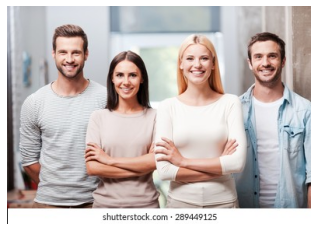

In [12]:
plt.axis("off")
plt.imshow(picture)
plt.show()

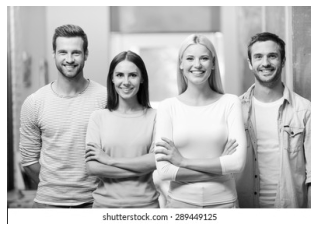

In [13]:
plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.show()

### Detect the Faces
We execute the detectMultiScale method to detect the faces. 

* The first input is the **grayscale image** we want to use for detection. 

* **scaleFactor** is used if the image is too large and we make it smaller by a factor of 1.1 as the face detector can only detect faces in a certain range of sizes.
 
* **minNeighbors** is one of the most important parameters in the model. Remember, the image is first split into many small sections before classification. If minNeighbors is 5, there must be 5 other parts, or sections, of a face around a certain section if that section can be classified as part of a face (because usually one part of the face is surrounded by other parts). If you make minNeighbors larger, than the model will be much more sure about the faces it detects but it might miss some faces. If you make this smaller, the model will detect more faces but it will also make more mistakes. 

* **minSize** is the minimum size a face must be in order for it to be viable for detection.  

The method will output the coordinates of all the faces found.

In [14]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

### Display the Results

The display will first output the length of the list of faces, or the number of faces, to the user. Then, for each of the face coordinates, cv2 will draw a green rectangle around the faces. Finally cv2_imshow function will display the main image with the rectangles drawn on top.



Found {len(faces)} faces!


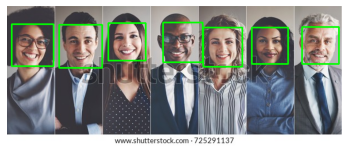

In [28]:
#print the number of faces found
print("Found {len(faces)} faces!")

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(picture, (x, y), (x+w, y+h), (0, 255, 0), 2)

#show the image with the rectangle drawn around it
plt.axis("off")
plt.imshow(picture)
plt.show()

## Try some images of your own.

There are some other images in this folder you can experiment with, or you can use your own image to try and detect faces!



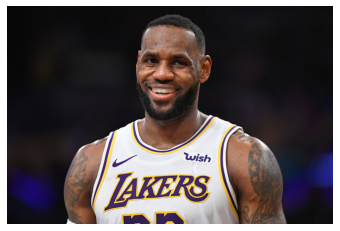

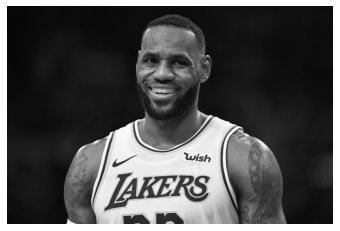

Found 2 faces!


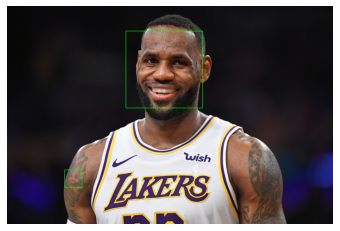

In [32]:
#import dependencies
import cv2
from skimage import io
import matplotlib.pyplot as plt

#get the cascade classifier from the cv2 filepath
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#url of the image
url = "lebron-james.jpg"

#read the picture from the url and turn it to BGR format
picture = io.imread(url)

#convert picture to grayscale
gray = cv2.cvtColor(picture, cv2.COLOR_RGB2GRAY)

plt.axis("off")
plt.imshow(picture)
plt.show()

plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.show()

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

#print the number of faces found
print("Found", len(faces), "faces!")

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(picture, (x, y), (x+w, y+h), (0, 255, 0), 2)

#show the image with the rectangle drawn around it
plt.axis("off")
plt.imshow(picture)
plt.show()